## Quotes segmentation/classification

In this notebook, we treat each quote of the corpus and assign them a score, or a binary variable determining if the quote is formal or informal according the dictionnary of informal formulation and slang vocabulary

In [2]:
#importing the required modules
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns

# Small adjustments to default style of plots, making sure it's readable and colorblind-friendly everywhere
plt.style.use('seaborn-colorblind')
plt.rcParams.update({'font.size' : 12.5,
                     'figure.figsize':(10,7)})

Read the dictionnary of slang/informal words:

In [1167]:
colloc_dict = pd.read_pickle('urban_dictionary.pkl')

In [1162]:
%%time
#copy the path of the sample quotes: (to big to put in the git)
#ALEX: 'C:/Users/alexb/Documents/Ecole/EPFL/MasterII/ADA/'
#JULES: ...
#MARIN: ...
#NICO: ...


path_2_data = 'C:/Users/alexb/Documents/Ecole/EPFL/MasterII/ADA/'


#import the dataset sample
raw_data = pd.read_json(path_2_data + 'Sample_cleaned_1Mio.json.bz2',compression="bz2",lines=True)

raw_data.describe()

Wall time: 46.6 s


,numOccurrences,p1,p2,delta_p,year
count,668534.00000,668534.000000,668534.000000,668534.000000,668534.000000
mean,3.55898,0.818245,0.161096,0.657149,2017.536327
std,22.64603,0.095738,0.081709,0.173361,1.770882
min,1.00000,0.500100,0.008600,0.300000,2015.000000
25%,1.00000,0.747400,0.093400,0.521900,2016.000000
50%,1.00000,0.830100,0.152600,0.674900,2018.000000
75%,2.00000,0.897300,0.221900,0.802200,2019.000000
max,12086.00000,0.990800,0.350000,0.982100,2020.000000


In [1168]:
#df1 = {
        #'slang':['different', 'Zealand']}
#df1 = pd.DataFrame(df1,columns=['slang'])
#df1['slang'] = (' ' + df1['slang'] + ' ')

#further cleaning
parenthesis = colloc_dict.word.str.contains(pat = ')', regex = False)
P_index = parenthesis[parenthesis].index

colloc_dict=colloc_dict.drop(P_index, inplace = False)
colloc_dict = colloc_dict.drop(2205, inplace = False)

p = colloc_dict.word.str.contains(pat = '|', regex = False)
p_index = p[p].index
colloc_dict=colloc_dict.drop(p_index, inplace = False)

p2 = colloc_dict.word.str.contains(pat = '+', regex = False)
p2_index = p2[p2].index
colloc_dict=colloc_dict.drop(p2_index, inplace = False)

p3 = colloc_dict.word.str.contains(pat = '???', regex = False)
p3_index = p3[p3].index
colloc_dict=colloc_dict.drop(p3_index, inplace = False)

p4 = colloc_dict.word.str.contains(pat = '*', regex = False)
p4_index = p4[p4].index
colloc_dict=colloc_dict.drop(p4_index, inplace = False)

In [1209]:
colloc_dict['word'] = colloc_dict['word'].str.lower()
colloc_dict_w_space['word'] = (' ' + colloc_dict['word'] + ' ')

In [1159]:
test_sample = raw_data.copy()
test_sample = test_sample[0:10000]
test_sample['quotation'] = test_sample['quotation'].str.lower()

In [1160]:
%%time
#mylist = df1.slang
mylist = colloc_dict_w_space.word
pattern = '|'.join(mylist)

test_sample['informal'] = test_sample.quotation.str.contains(pattern, case = False, regex = True)
test_sample['informal']*= 1
test_sample['matched_w'] = test_sample['quotation'].str.extract('('+'|'.join(mylist) + ')', expand=True)


Wall time: 6.49 s


In [1161]:
%time
detected_word = test_sample.groupby(['matched_w'])['matched_w'].count()
list_delete = detected_word.sort_values(axis=0, ascending = False)
list_delete[0:60]


Wall time: 0 ns


matched_w
 the        964
 to         855
 a          801
 was        378
 are        370
 that       353
 and        339
 we         312
 in         286
 not        229
 has        207
 for        183
 it         169
 you        158
 had        145
 just       130
 with       126
 like       116
 can        108
 got        108
 our         92
 know        92
 about       91
 all         88
 am          88
 my          83
 he          73
 one         73
 they        72
 so          65
 people      64
 no          62
 if          62
 there       57
 out         53
 do          52
 but         48
 when        44
 up          44
 see         41
 did         40
 get         39
 thing       39
 good        35
 their       35
 his         34
 feel        34
 now         33
 who         32
 new         32
 i'm         31
 say         31
 how         30
 time        29
 many        28
 great       27
 why         27
 she         26
 him         25
 kind        22
Name: matched_w, dtype: int64

In [1145]:
test_sample

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,p1,p2,delta_p,year,informal,matched_w
0,2015-11-11-109291,they'll call me lots of different things. libe...,Chris Christie,[Q63879],2015-11-11 00:55:12,1,"[[Chris Christie, 0.7395], [Bobby Jindal, 0.15...",[http://thehill.com/blogs/ballot-box/259760-ch...,E,0.7395,0.1505,0.5890,2015,1,not
1,2015-09-11-070666,it's kind of the same way it's been with the r...,Niklas Kronwall,[Q722939],2015-09-11 19:54:00,1,"[[Niklas Kronwall, 0.7119], [None, 0.2067], [H...",[http://redwings.nhl.com/club/news.htm?id=7787...,E,0.7119,0.2067,0.5052,2015,1,kind
2,2015-11-09-033345,i had a chuckle: they were showing a video of ...,Kris Draper,[Q948695],2015-11-09 00:57:45,3,"[[Kris Draper, 0.8782], [None, 0.1043], [Serge...",[http://ca.rd.yahoo.com/sports/rss/nfl/SIG=13u...,E,0.8782,0.1043,0.7739,2015,1,had
3,2015-09-05-038628,new zealand will go in with a lot of confidenc...,John Eales,[Q926351],2015-09-05 02:40:10,3,"[[John Eales, 0.7896], [None, 0.2006], [Toutai...",[http://www.stuff.co.nz/sport/rugby/all-blacks...,E,0.7896,0.2006,0.5890,2015,1,in
4,2015-02-11-042325,in his suicide note he even made a joke thanki...,Pat Buckley,"[Q19956564, Q23006312, Q7143252, Q7143253]",2015-02-11 09:59:09,1,"[[Pat Buckley, 0.8816], [None, 0.1184]]",[http://independent.ie/life/health-wellbeing/m...,E,0.8816,0.1184,0.7632,2015,1,his
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2015-12-25-000598,a lot of people have sent me fawlty towers scr...,John Cleese,[Q25014],2015-12-25 00:00:49,1,"[[John Cleese, 0.6643], [None, 0.3357]]",[http://news.bbc.co.uk/news/entertainment-arts...,E,0.6643,0.3357,0.3286,2015,1,lot
9996,2015-08-20-065922,it's akin to declaring war on the sunni arabs ...,Lindsay Graham,[Q58315159],2015-08-20 21:51:17,3,"[[Lindsay Graham, 0.8684], [None, 0.0958], [Ch...",[http://www.defenseone.com/ideas/2015/08/dont-...,E,0.8684,0.0958,0.7726,2015,1,to
9997,2015-10-06-048321,i'm not a specialist... (but) i infuse the mus...,David Lockington,"[Q5236728, Q57065194]",2015-10-06 12:44:36,1,"[[David Lockington, 0.7659], [None, 0.2173], [...",[http://www.thenewstribune.com/entertainment/a...,E,0.7659,0.2173,0.5486,2015,1,not
9998,2015-01-25-018944,if david gregory were not a major media person...,Tom Fitton,[Q7815791],2015-01-25 23:00:00,1,"[[Tom Fitton, 0.855], [None, 0.102], [Emily Mi...",[http://www.thenewamerican.com/usnews/crime/it...,E,0.8550,0.1020,0.7530,2015,1,not


array([[<AxesSubplot:title={'center':'informal'}>]], dtype=object)

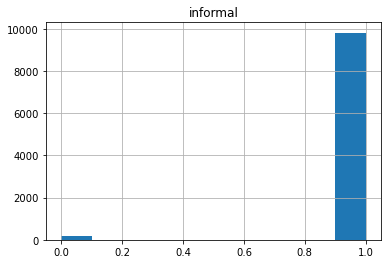

In [1144]:
test_sample.hist(column='informal')

In [1111]:
print(test_sample.informal.min())
print(test_sample.informal.max())

0
1


In [1120]:
pattern

' janky | slumpin\' | yayeeyay | hard-core | brutal | ho-bag | hazy | hork | hecka | hella | wet wagons | twomp | ducket | mad | a-hole | ass kisser | clap | cob | dry hump | no shit | puke | folks | holla | dog | raunchy | energy | toss salid | cassette | no way | raw | 187 | flower run | tofu | rim job | connected | riiiiiiight | tiiight | o.g. | panty | tweeks coffee | flipside | issues | whooped | hippy | tra la la | gaff tape | lyons | talent | bounce | mind control | skilz | the game | player | shag | sweet | real men | watchers | warn | check | velcro | peeps | mah | lets get started, shall we? | dealio | fits | young | grill | scrilla | chedda | bank | blood | intensity | flirt | b.a.f | dissed | disco | fantabulous | prophylactic | guh | piscicles | yen | yea | nincompoop | googlie | real women | iced-out | heezi | wiggle | wthn | sexiled | h2h | school | harlot | skivvies | bj | zone | fully cooked | funkadelic | yuppie food stamps | boujouix | wai | la | inhtsa | craptacular

In [1192]:
test = {
        'word':['it was a good day','On the way home','to-Hallo-to','with my cat', 'coucou, je suis','-the-'],
        'url':[3,3,3,3,4,4]}
df_test = pd.DataFrame(test,columns=['word','url'])
df_test

,word,url
0,it was a good day,3
1,On the way home,3
2,to-Hallo-to,3
3,with my cat,3
4,"coucou, je suis",4
5,-the-,4


In [1193]:
df_test['word'] = df_test['word'].str.lower()
df_test_space['word'] = (' ' + df_test['word'] + ' ')

In [1195]:
test2 = {
        'quotation':['i was old','i to-hallo-to hallo','I am on the Way home right now','I am with my cat the crowd','eat the banana','blba hallo bla','the cat is happy'],'p':[2,3,4,5,4,5,5]}
df_test2 = pd.DataFrame(test2,columns=['quotation','p'])
df_test2['quotation'] = df_test2['quotation'].str.lower()
df_test2

,quotation,p
0,i was old,2
1,i to-hallo-to hallo,3
2,i am on the way home right now,4
3,i am with my cat the crowd,5
4,eat the banana,4
5,blba hallo bla,5
6,the cat is happy,5


In [1196]:
mylist2 = df_test_space.word
pattern2 = '|'.join(mylist2)

In [1197]:
df_test2['informal'] = df_test2.quotation.str.contains(pattern2, case = False, regex = True)
df_test2['informal']*= 1
df_test2['matched_w'] = df_test2['quotation'].str.extract('('+'|'.join(mylist2) + ')', expand=True)

In [1198]:
df_test2['informal2'] = df_test2.quotation.str.contains(pattern, case = False, regex = True)
df_test2['informal2']*= 1
df_test2['matched_w2'] = df_test2['quotation'].str.extract('('+'|'.join(mylist) + ')', expand=True)

In [1199]:
df_test2

,quotation,p,informal,matched_w,informal2,matched_w2
0,i was old,2,0,NaN,1,was
1,i to-hallo-to hallo,3,1,to-hallo-to,0,NaN
2,i am on the way home right now,4,1,on the way home,1,am
3,i am with my cat the crowd,5,1,with my cat,1,am
4,eat the banana,4,0,NaN,1,the
5,blba hallo bla,5,0,NaN,1,hallo
6,the cat is happy,5,0,NaN,1,cat


In [1206]:
pattern[0:10]


' janky | s'

In [1208]:
pattern2[0:30]

' it was a good day | on the wa'